# **27/10/2025**


# **COVARIENCE**

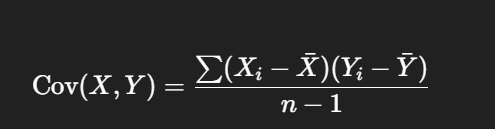

In [25]:
hours_studied = [2,4,6,8,10]
exam_scores = [50,60,70,80,90]

In [26]:
#step1 :calculate the mean of both lists
mean_hours = sum(hours_studied)/len(hours_studied)
mean_scores = sum(exam_scores)/len(exam_scores )
print(mean_hours)
print(mean_scores)

6.0
70.0


In [27]:
#step2:calculate the diffrence from mean for each value/data point
diff_hours = [x-mean_hours for x in hours_studied]
diff_scores = [y-mean_scores for y in exam_scores]
print(diff_hours)
print(diff_scores)

[-4.0, -2.0, 0.0, 2.0, 4.0]
[-20.0, -10.0, 0.0, 10.0, 20.0]


In [28]:
#step3 : multiply the diffrence for corresponding data point
prod_diff=[diff_hours[i]*diff_scores[i] for i in range(len(diff_hours))]
print(prod_diff)

[80.0, 20.0, 0.0, 20.0, 80.0]


In [29]:
#step4:sum of products
sum_prod_diff = sum(prod_diff)
print(sum_prod_diff)

200.0


In [30]:
#step5:divide by th number of data point minus 1(n-1)
covariance = sum_prod_diff/(len(hours_studied)-1)

In [31]:
#output the covairance is
print("Covarience between hours studied and exam score:",covariance)

Covarience between hours studied and exam score: 50.0


CALCULATE THE COVARIANCE MATRIX"HOURS STUDIED " AND "EXAM SCORES"

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [33]:
hours_studied = [2,4,6,8,10]
exam_scores = [50,60,70,80,90]

In [34]:
# stack the data into a 2D array (each row is a data point,each column is a variable)
data = np.array([hours_studied,exam_scores])
print(data)
#calculate the covariance matrix using numpy's cov function
cov_matrix = np.cov(data)

[[ 2  4  6  8 10]
 [50 60 70 80 90]]


In [36]:
#print the matrix
print ("Covariance Matrix:\n",cov_matrix)

Covariance Matrix:
 [[ 10.  50.]
 [ 50. 250.]]


# **CORRILATION**
---


from covariance to correlation

In [37]:
x = np.array([2,4,6,8,10])
y = np.array([50,60,70,80,90])

#step 1 : compute means
mean_x = np.mean(x)
mean_y = np.mean(y)
print(mean_x)
print(mean_y)

# step2 : center the data
centered_x = x-mean_x
centered_y = y-mean_y
print(centered_x)
print(centered_y)

#step 3:compute covareince manually
cov_xy=np.sum(centered_x*centered_y)/(len(x)-1)
print(cov_xy)

#setp 4:compute standard deviations
std_x = np.std(x,ddof=1)
std_y = np.std(y,ddof=1) # ddof --> delet degree of freedom is 1 for sample std
print(std_x)
print(std_y)

#step 5:compute correlation coefficient
correlation = cov_xy/(std_x*std_y)

print("covariance between x ans y:",cov_xy)
print("correlation between x and y :",correlation)

6.0
70.0
[-4. -2.  0.  2.  4.]
[-20. -10.   0.  10.  20.]
50.0
3.1622776601683795
15.811388300841896
covariance between x ans y: 50.0
correlation between x and y : 1.0


In [44]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

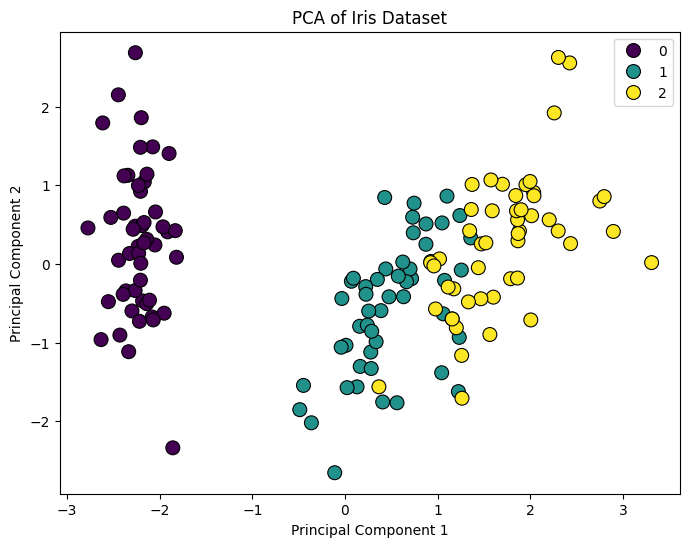

In [55]:
iris = load_iris()
X = iris.data
y = iris.target

#standardization the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

#plot the two pricipal components
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, palette='viridis', edgecolor='k', s=100)
plt.title('PCA of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()



# **OUTLIERS**

--> is the data point that stands out of the significantly from the rest of the data

Types Of outliers


-->Global Outliers : Stand out of entire data set
-->Contextual Outliers : Depends on the surroundings
-->Collective Outliers : Group that deviate together

1)trimming : its excludes the outliers value from our analysis
2)Cappimg : it limits the extrame values to a certain percentiel
3)Discreatization : it transforms continious variables into categorical ones



In [ ]:
#--> is the data point that stands out of the significantly from the rest of the data

Types Of outliers

-->Global Outliers : Stand out of entire data set
-->Contextual Outliers : Depends on the surroundings
-->Collective Outliers : Group that deviate together

1)trimming : its excludes the outliers value from our analysis
2)Cappimg : it limits the extrame values to a certain percentiel
3)Discreatization : it transforms continious variables into categorical ones

For normal Ditribution

In [ ]:
#for normal distributions, the data points that fall outside the range of mean minus three standard deviations (mean 3g) and mean plus three standard deviations (mean + 3g) are typically considered outliers.
# where, mean average of the data points
# standard deviation (σ) = measure of the amount of variation or dispersion of a set of values

For SKewed Distribution

In [ ]:
# use iner-quartile Range (IQR) Methods
#the data pounts that falls below Q1 - 1.5*
#IQR or above Q3 + 1.58* IQR are considered Outliers

#calculate q1(25th percentile) and Q3 (&5th percentile)
# mean +- standard_deviation
#IQR = q3 - q1

In [ ]:
#collecting data
#heights : 1000 values , mostly 170cm
#Step2 mean = 170 , std = 10cm
#lower bound = 170 - 3*10 = 140
#upper bound = 170 + 3*10 = 140

In [56]:
# iqr method (salary 30k,60k,few near 2laks)
# collect 1000 values , mostly clustered lower end
# Assume some sample data based on the description for demonstration
salaries = [30000] * 500 + [60000] * 400 + [200000] * 100 # Example data

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = np.percentile(salaries, 25)
Q3 = np.percentile(salaries, 75)

# Calculate IQR
IQR = Q3 - Q1

# Calculate lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")
print(f"Lower Bound for Outliers (IQR method): {lower_bound}")
print(f"Upper Bound for Outliers (IQR method): {upper_bound}")

Q1: 30000.0
Q3: 60000.0
IQR: 30000.0
Lower Bound for Outliers (IQR method): -15000.0
Upper Bound for Outliers (IQR method): 105000.0


In [61]:
import random

# --- 1. Simulate rolling two dice 1000 times ---
num_rolls = 1000
sums = []

for _ in range(num_rolls):
    die1 = random.randint(1, 6)
    die2 = random.randint(1, 6)
    total = die1 + die2
    sums.append(total)

# --- 2. Count relative frequencies of each possible sum (2 to 12) ---
print("Sum\tSimulated Probability\tTheoretical Probability")

for total in range(2, 13):
    simulated_prob = sums.count(total) / num_rolls

    # Theoretical probability = (number of combinations) / 36
    combinations = 6 - abs(total - 7)
    theoretical_prob = combinations / 36

    print(f"{total}\t{simulated_prob:.3f}\t\t\t{theoretical_prob:.3f}")


Sum	Simulated Probability	Theoretical Probability
2	0.024			0.028
3	0.057			0.056
4	0.077			0.083
5	0.107			0.111
6	0.146			0.139
7	0.172			0.167
8	0.157			0.139
9	0.101			0.111
10	0.077			0.083
11	0.054			0.056
12	0.028			0.028
